In [1]:
import pandas as pd

In [2]:
hr_data = pd.read_csv("Human_Attrition_Orig.csv")

In [3]:
hr_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [4]:
#Check the structure of dataset
for i in range(len(hr_data.columns)):
    if(hr_data.dtypes[i]=="object"):
            print(hr_data.columns[i])

Attrition
BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
Over18
OverTime


In [5]:
#Let's remove the strongly correlated variables
hr_data_uc = hr_data[['Age','DailyRate',
'DistanceFromHome',
'Education',
'EmployeeCount',
'EmployeeNumber',
'EnvironmentSatisfaction',
'HourlyRate',
'JobInvolvement',
'JobLevel',
'JobSatisfaction',
'MonthlyIncome',
'MonthlyRate',
'NumCompaniesWorked',
'PercentSalaryHike',
'PerformanceRating',
'RelationshipSatisfaction',
'StandardHours',
'StockOptionLevel',
'TotalWorkingYears',
'TrainingTimesLastYear',
'WorkLifeBalance',
'YearsAtCompany',
'YearsInCurrentRole',
'YearsSinceLastPromotion',
'YearsWithCurrManager']].copy()
hr_data_uc.head()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [6]:
#Copying categorical data
hr_data_cat = hr_data[['Attrition', 'BusinessTravel','Department',
                       'EducationField','Gender','JobRole',
                       'MaritalStatus',
                       'Over18', 'OverTime']].copy()
hr_data_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [7]:
Num_val = {'Yes':1, 'No':0}
hr_data_cat['Attrition'] = hr_data_cat["Attrition"].apply(lambda x: Num_val[x])
hr_data_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,1,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,0,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,1,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,0,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,0,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [8]:
hr_data_cat = pd.get_dummies(hr_data_cat)
hr_data_cat.head()

,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,1,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,1,1,0,1
1,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,1,0
2,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


In [9]:
hr_data_final = pd.concat([hr_data_uc, hr_data_cat], axis=1)
hr_data_final.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


In [10]:
hr_data_final.to_csv("hr_data_final.csv")

## Model

In [11]:
%matplotlib inline

In [12]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.ensemble import VotingClassifier



data=pd.read_csv('hr_data_orig.csv')
del data['Unnamed: 0']
data.head()
y=data.Attrition
x=data.drop('Attrition',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head()
x_test.head()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
565,23,310,10,1,1,784,1,79,4,1,...,0,1,0,0,0,0,1,1,1,0
6,59,1324,3,3,1,10,3,81,4,1,...,0,0,0,0,0,1,0,1,0,1
384,36,164,2,2,1,513,2,61,2,3,...,0,0,1,0,0,1,0,1,1,0
1391,38,1404,1,3,1,1961,1,59,2,1,...,0,0,0,1,0,0,1,1,1,0
1345,35,219,16,2,1,1886,4,44,2,2,...,0,0,0,0,0,1,0,1,0,1


### XGboost

0.8809523809523809


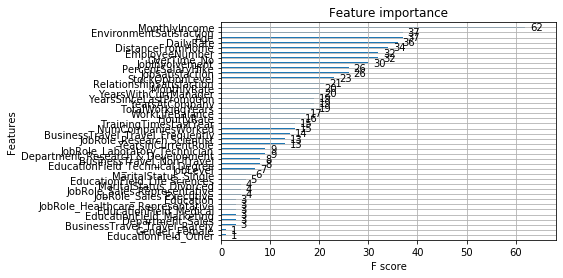

In [13]:
#instantiate model and train
params_xg = {"objective":"binary:logistic", "max_depth":4,"nthread":5,"learning_rate":0.1,
         "subsample":0.2,"colsample_bytree":0.3,"n_estimators":20,"seed":52}

model_xg = XGBClassifier(params=params_xg)
model_xg.fit(x_train, y_train)

# make predictions for test set
y_pred_xg = model_xg.predict(x_test)
predictions_xg = [round(value) for value in y_pred_xg]

accuracy_xg = accuracy_score(y_test, predictions_xg)
print (accuracy_xg)
#print("Accuracy: %.2f%%" % (accuracy_xg * 100.0))
xgb.plot_importance(model_xg)
plt.rcParams['figure.figsize'] = [10, 7]
plt.show()

### Random Forest

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


#Create the model and train
model_rf = RandomForestClassifier(n_estimators=50, random_state=10)
model_rf.fit(x_train,y_train)
#predict the results for test
pred_rf = model_rf.predict(x_test)
#test the accuracy
accuracy_score(y_test, pred_rf)

0.8741496598639455

### Ensemble Model

In [15]:
#create a dictionary of our models
rf = RandomForestClassifier(n_estimators=50, random_state = 100)
model = XGBClassifier(params=params_xg)
estimators=[('xgb', model_xg), ('rf', model_rf)]

#create our voting classifier
ensemble = VotingClassifier(estimators, voting='soft',weights=[2,1])

#fit model to training data
ensemble.fit(x_train, y_train)

#test our model on the test data
ensemble.score(x_test, y_test)

0.891156462585034